In [1]:
%matplotlib inline
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn import svm

In [2]:
# terrestrial & cable
data=pd.read_excel('drama_comment_link.xlsx','predictSheet')

In [3]:
X=[]
temp=[]
for i in range(len(data)):
    temp=[data.ix[i,'comment']]
    X.append(temp)
X = np.array(X)
y=data['rating']

C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [4]:
# set auto kernel / C / gamma
clf = svm.SVR()
clf.fit(X, y)
print('R squared score\n',clf.score(X,y))
print('parameter\n',clf.get_params)

R squared score
 0.100532550955
parameter
 <bound method BaseEstimator.get_params of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)>


In [7]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge

train_size = len(data)
#set kernel
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})
#set nums
X_plot = np.linspace(0, 5, 100000)[:, None]

t0 = time.time()
svr.fit(X, y)
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

t0 = time.time()
kr.fit(X, y)
kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in %.3f s"
      % kr_fit)


sv_ratio = svr.best_estimator_.support_.shape[0] / train_size
print("Support vector ratio: %.3f" % sv_ratio)

t0 = time.time()
#@param <- test data
y_svr = svr.predict(X)
svr_predict = time.time() - t0
print("SVR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], svr_predict))

t0 = time.time()
y_kr = kr.predict(X)
kr_predict = time.time() - t0
print("KRR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], kr_predict))

SVR complexity and bandwidth selected and model fitted in 10.780 s
KRR complexity and bandwidth selected and model fitted in 11.250 s
Support vector ratio: 0.988
SVR prediction for 100000 inputs in 0.063 s
KRR prediction for 100000 inputs in 0.048 s


In [8]:
print(svr.best_estimator_)
print(svr.best_score_)
print(svr.best_params_)
print(svr.best_index_)
print(svr.n_splits_)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=100.0,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
-0.172726051932
{'C': 1.0, 'gamma': 100.0}
4
5


In [9]:
print(kr.best_estimator_)
print(kr.best_score_)
print(kr.best_params_)
print(kr.best_index_)
print(kr.n_splits_)

KernelRidge(alpha=1.0, coef0=1, degree=3, gamma=0.01, kernel='rbf',
      kernel_params=None)
-0.836733346834
{'alpha': 1.0, 'gamma': 0.01}
0
5


C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:9: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


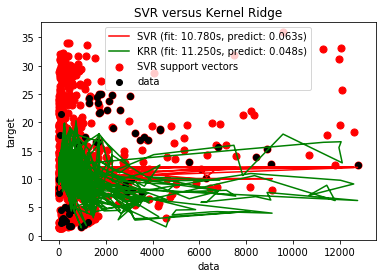

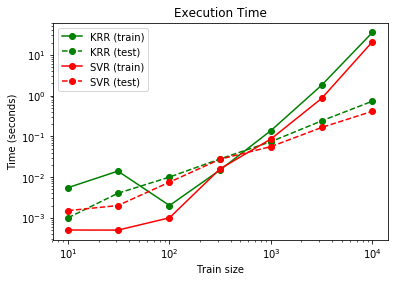

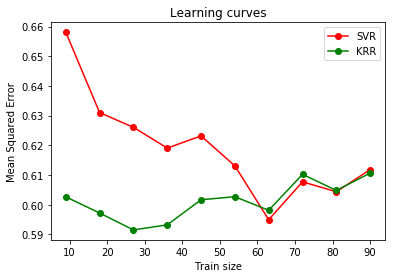

In [10]:
rng = np.random.RandomState(0)

train_X = X
train_y = y

sv_ind = svr.best_estimator_.support_
plt.scatter(train_X[sv_ind], train_y[sv_ind], c='r', s=50, label='SVR support vectors',zorder=2)
plt.scatter(train_X[:100], train_y[:100], c='k', label='data', zorder=2)
plt.hold('on')
plt.plot(train_X, y_svr, c='r',
         label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
plt.plot(train_X, y_kr, c='g',
         label='KRR (fit: %.3fs, predict: %.3fs)' % (kr_fit, kr_predict))
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR versus Kernel Ridge')
plt.legend()

# Visualize training and prediction time
plt.figure()

# Generate sample data
X = 3000 * rng.rand(10000, 1)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))
sizes = np.logspace(1, 4, 7, dtype=np.int)
for name, estimator in {"KRR": KernelRidge(kernel='rbf', alpha=0.1,
                                           gamma=10),
                        "SVR": SVR(kernel='rbf', C=1e1, gamma=10)}.items():
    train_time = []
    test_time = []
    for train_test_size in sizes:
        t0 = time.time()
        estimator.fit(X[:train_test_size], y[:train_test_size])
        train_time.append(time.time() - t0)

        t0 = time.time()
        estimator.predict(X_plot[:1000])
        test_time.append(time.time() - t0)

    plt.plot(sizes, train_time, 'o-', color="r" if name == "SVR" else "g",
             label="%s (train)" % name)
    plt.plot(sizes, test_time, 'o--', color="r" if name == "SVR" else "g",
             label="%s (test)" % name)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Train size")
plt.ylabel("Time (seconds)")
plt.title('Execution Time')
plt.legend(loc="best")

# Visualize learning curves
plt.figure()

svr = SVR(kernel='rbf', C=1e1, gamma=0.1)
kr = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)
train_sizes, train_scores_svr, test_scores_svr = \
    learning_curve(svr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)
train_sizes_abs, train_scores_kr, test_scores_kr = \
    learning_curve(kr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)

plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r",label="SVR")
plt.plot(train_sizes, -test_scores_kr.mean(1), 'o-', color="g",label="KRR")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")

plt.show()

In [13]:
svr_rbf = SVR(kernel='rbf', C=1e0, gamma=100.0)
y_rbf = svr_rbf.fit(train_X, train_y).predict(train_X)

C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:3: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  app.launch_new_instance()
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


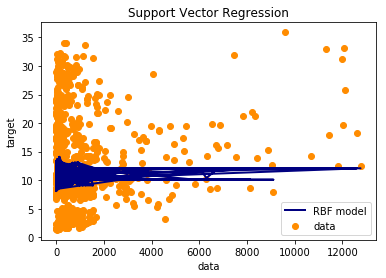

In [14]:
lw = 2
plt.scatter(train_X, train_y, color='darkorange', label='data')
plt.hold('on')
plt.plot(train_X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
y_pred = svr_rbf.predict(train_X)
y_true = train_y
#sum(pred-true)/nsmaples
print("MAE:",mean_absolute_error(y_true, y_pred))
print("MSE:",mean_squared_error(y_true, y_pred))
print("Median error:",median_absolute_error(y_true, y_pred))
print("R squared:",r2_score(y_true, y_pred))

MAE: 4.89597140049
MSE: 49.6814773707
Median error: 3.03875
R squared: 0.107198259313


In [16]:
from sklearn.model_selection import cross_val_score
#Returns the coefficient of determination R^2 of the prediction.!!!
svr.fit(train_X,train_y)
print("score : ",svr.score(train_X,train_y))
scores = cross_val_score(svr,train_X,train_y,cv=5)
print("cross validation scores : ",scores)
#The mean score and the 95% confidence interval of the score estimate are hence given by
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

score :  0.380715694398
cross validation scores :  [-0.23135109 -0.78954195 -0.32733494 -0.30058276 -0.84040072]
Accuracy: -0.50 (+/- 0.52)


In [17]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_rbf = svr_rbf.fit(train_X, train_y).predict(train_X)

C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:3: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  app.launch_new_instance()
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


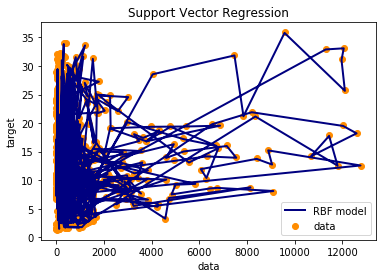

In [19]:
lw = 2
plt.scatter(train_X, train_y, color='darkorange', label='data')
plt.hold('on')
plt.plot(train_X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
y_pred = svr_rbf.predict(train_X)
y_true = train_y
#sum(pred-true)/nsmaples
print("MAE:",mean_absolute_error(y_true, y_pred))
print("MSE:",mean_squared_error(y_true, y_pred))
print("Median error:",median_absolute_error(y_true, y_pred))
print("R squared:",r2_score(y_true, y_pred))

MAE: 2.50779628375
MSE: 25.4874748634
Median error: 0.100227303089
R squared: 0.541976947384


In [51]:
# terrestrial & cable remove last week data
data=pd.read_excel('drama_comment_link.xlsx','deleteLastweek')

In [52]:
X=[]
temp=[]
for i in range(len(data)):
    temp=[data.ix[i,'comment']]
    X.append(temp)
X = np.array(X)
y=data['rating']

clf = svm.SVR()
clf.fit(X, y)
print('R squared score\n',clf.score(X,y))
print('parameter\n',clf.get_params)

R squared score
 0.0972517217359
parameter
 <bound method BaseEstimator.get_params of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)>


C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [53]:
train_X = X
train_y = y
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_rbf = svr_rbf.fit(train_X, train_y).predict(train_X)

C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:3: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  app.launch_new_instance()
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


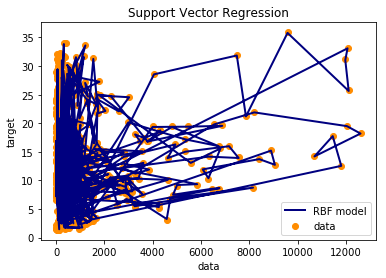

In [35]:
lw = 2
plt.scatter(train_X, train_y, color='darkorange', label='data')
plt.hold('on')
plt.plot(train_X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
y_pred = svr_rbf.predict(train_X)
y_true = train_y
#sum(pred-true)/nsmaples
print("MAE:",mean_absolute_error(y_true, y_pred))
print("MSE:",mean_squared_error(y_true, y_pred))
print("Median error:",median_absolute_error(y_true, y_pred))
print("R squared:",r2_score(y_true, y_pred))

MAE: 2.48364102462
MSE: 25.3885835925
Median error: 0.100293778512
R squared: 0.548522382029


In [37]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge

train_size = len(data)
#set kernel
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})
#set nums
X_plot = np.linspace(0, 5, 100000)[:, None]

t0 = time.time()
svr.fit(X, y)
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

t0 = time.time()
kr.fit(X, y)
kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in %.3f s"
      % kr_fit)


sv_ratio = svr.best_estimator_.support_.shape[0] / train_size
print("Support vector ratio: %.3f" % sv_ratio)

t0 = time.time()
#@param <- test data
y_svr = svr.predict(X)
svr_predict = time.time() - t0
print("SVR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], svr_predict))

t0 = time.time()
y_kr = kr.predict(X)
kr_predict = time.time() - t0
print("KRR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], kr_predict))

SVR complexity and bandwidth selected and model fitted in 9.371 s
KRR complexity and bandwidth selected and model fitted in 9.144 s
Support vector ratio: 0.988
SVR prediction for 100000 inputs in 0.051 s
KRR prediction for 100000 inputs in 0.046 s


In [38]:
print(svr.best_estimator_)
print(svr.best_score_)
print(svr.best_params_)
print(svr.best_index_)
print(svr.n_splits_)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=100.0,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
-0.192666330724
{'C': 1.0, 'gamma': 100.0}
4
5


C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:9: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


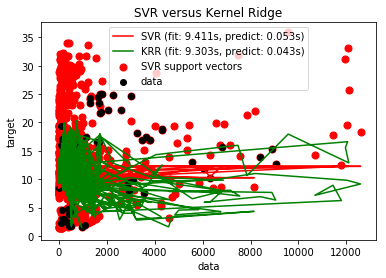

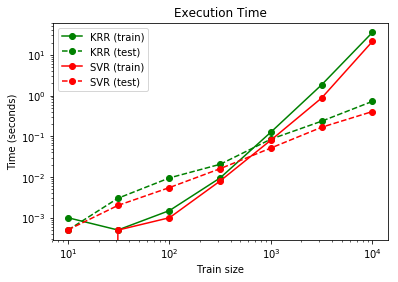

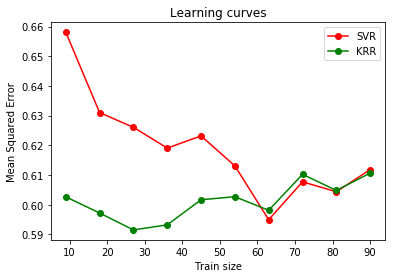

In [29]:
rng = np.random.RandomState(0)

train_X = X
train_y = y

sv_ind = svr.best_estimator_.support_
plt.scatter(train_X[sv_ind], train_y[sv_ind], c='r', s=50, label='SVR support vectors',zorder=2)
plt.scatter(train_X[:100], train_y[:100], c='k', label='data', zorder=2)
plt.hold('on')
plt.plot(train_X, y_svr, c='r',
         label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
plt.plot(train_X, y_kr, c='g',
         label='KRR (fit: %.3fs, predict: %.3fs)' % (kr_fit, kr_predict))
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR versus Kernel Ridge')
plt.legend()

# Visualize training and prediction time
plt.figure()

# Generate sample data
X = 3000 * rng.rand(10000, 1)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))
sizes = np.logspace(1, 4, 7, dtype=np.int)
for name, estimator in {"KRR": KernelRidge(kernel='rbf', alpha=0.1,
                                           gamma=10),
                        "SVR": SVR(kernel='rbf', C=1e1, gamma=10)}.items():
    train_time = []
    test_time = []
    for train_test_size in sizes:
        t0 = time.time()
        estimator.fit(X[:train_test_size], y[:train_test_size])
        train_time.append(time.time() - t0)

        t0 = time.time()
        estimator.predict(X_plot[:1000])
        test_time.append(time.time() - t0)

    plt.plot(sizes, train_time, 'o-', color="r" if name == "SVR" else "g",
             label="%s (train)" % name)
    plt.plot(sizes, test_time, 'o--', color="r" if name == "SVR" else "g",
             label="%s (test)" % name)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Train size")
plt.ylabel("Time (seconds)")
plt.title('Execution Time')
plt.legend(loc="best")

# Visualize learning curves
plt.figure()

svr = SVR(kernel='rbf', C=1e1, gamma=0.1)
kr = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)
train_sizes, train_scores_svr, test_scores_svr = \
    learning_curve(svr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)
train_sizes_abs, train_scores_kr, test_scores_kr = \
    learning_curve(kr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)

plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r",label="SVR")
plt.plot(train_sizes, -test_scores_kr.mean(1), 'o-', color="g",label="KRR")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")

plt.show()

C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


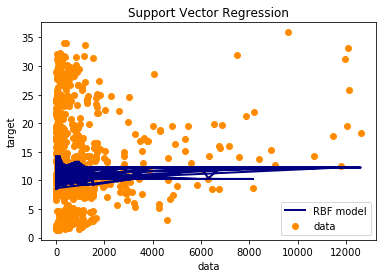

In [39]:
svr_rbf = SVR(kernel='rbf', C=1e0, gamma=100.0)
y_rbf = svr_rbf.fit(train_X, train_y).predict(train_X)

lw = 2
plt.scatter(train_X, train_y, color='darkorange', label='data')
plt.hold('on')
plt.plot(train_X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [40]:
y_pred = svr_rbf.predict(train_X)
y_true = train_y
#sum(pred-true)/nsmaples
print("MAE:",mean_absolute_error(y_true, y_pred))
print("MSE:",mean_squared_error(y_true, y_pred))
print("Median error:",median_absolute_error(y_true, y_pred))
print("R squared:",r2_score(y_true, y_pred))

MAE: 4.9430680197
MSE: 50.3722059654
Median error: 3.01147070312
R squared: 0.104246068775


In [54]:
# only terrestrial
data=pd.read_excel('drama_comment_link.xlsx','terrestrialData')

In [55]:
X=[]
temp=[]
for i in range(len(data)):
    temp=[data.ix[i,'comment']]
    X.append(temp)
X = np.array(X)
y=data['rating']

clf = svm.SVR()
clf.fit(X, y)
print('R squared score\n',clf.score(X,y))
print('parameter\n',clf.get_params)

R squared score
 0.0598865677677
parameter
 <bound method BaseEstimator.get_params of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)>


C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:8: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


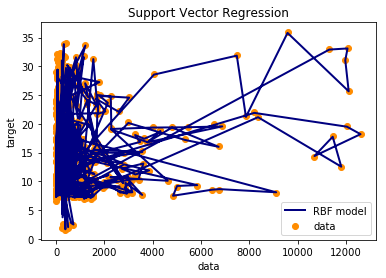

In [56]:
train_X = X
train_y = y
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_rbf = svr_rbf.fit(train_X, train_y).predict(train_X)

lw = 2
plt.scatter(train_X, train_y, color='darkorange', label='data')
plt.hold('on')
plt.plot(train_X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [44]:
y_pred = svr_rbf.predict(train_X)
y_true = train_y
#sum(pred-true)/nsmaples
print("MAE:",mean_absolute_error(y_true, y_pred))
print("MSE:",mean_squared_error(y_true, y_pred))
print("Median error:",median_absolute_error(y_true, y_pred))
print("R squared:",r2_score(y_true, y_pred))

MAE: 2.18693710552
MSE: 20.0653804709
Median error: 0.100245789752
R squared: 0.568503583892


In [48]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge

train_size = len(data)
#set kernel
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})
#set nums
X_plot = np.linspace(0, 5, 100000)[:, None]

t0 = time.time()
svr.fit(train_X, train_y)
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

t0 = time.time()
kr.fit(train_X, train_y)
kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in %.3f s"
      % kr_fit)


sv_ratio = svr.best_estimator_.support_.shape[0] / train_size
print("Support vector ratio: %.3f" % sv_ratio)

t0 = time.time()
#@param <- test data
y_svr = svr.predict(train_X)
svr_predict = time.time() - t0
print("SVR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], svr_predict))

t0 = time.time()
y_kr = kr.predict(train_X)
kr_predict = time.time() - t0
print("KRR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], kr_predict))

SVR complexity and bandwidth selected and model fitted in 7.476 s
KRR complexity and bandwidth selected and model fitted in 7.351 s
Support vector ratio: 0.991
SVR prediction for 100000 inputs in 0.039 s
KRR prediction for 100000 inputs in 0.025 s


In [49]:
print(svr.best_estimator_)
print(svr.best_score_)
print(svr.best_params_)
print(svr.best_index_)
print(svr.n_splits_)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=100.0,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
-0.2528279079
{'C': 1.0, 'gamma': 100.0}
4
5


C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:9: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


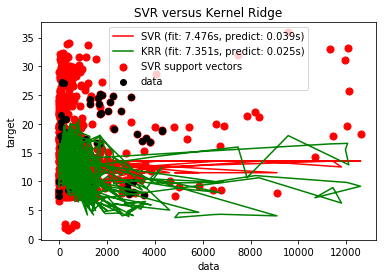

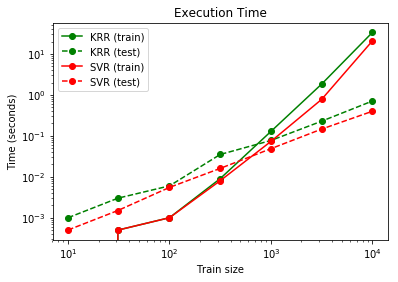

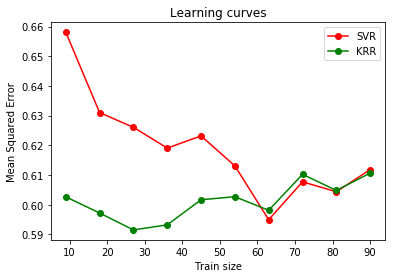

In [57]:
rng = np.random.RandomState(0)

train_X = X
train_y = y

sv_ind = svr.best_estimator_.support_
plt.scatter(train_X[sv_ind], train_y[sv_ind], c='r', s=50, label='SVR support vectors',zorder=2)
plt.scatter(train_X[:100], train_y[:100], c='k', label='data', zorder=2)
plt.hold('on')
plt.plot(train_X, y_svr, c='r',
         label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
plt.plot(train_X, y_kr, c='g',
         label='KRR (fit: %.3fs, predict: %.3fs)' % (kr_fit, kr_predict))
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR versus Kernel Ridge')
plt.legend()

# Visualize training and prediction time
plt.figure()

# Generate sample data
X = 3000 * rng.rand(10000, 1)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))
sizes = np.logspace(1, 4, 7, dtype=np.int)
for name, estimator in {"KRR": KernelRidge(kernel='rbf', alpha=0.1,
                                           gamma=10),
                        "SVR": SVR(kernel='rbf', C=1e1, gamma=10)}.items():
    train_time = []
    test_time = []
    for train_test_size in sizes:
        t0 = time.time()
        estimator.fit(X[:train_test_size], y[:train_test_size])
        train_time.append(time.time() - t0)

        t0 = time.time()
        estimator.predict(X_plot[:1000])
        test_time.append(time.time() - t0)

    plt.plot(sizes, train_time, 'o-', color="r" if name == "SVR" else "g",
             label="%s (train)" % name)
    plt.plot(sizes, test_time, 'o--', color="r" if name == "SVR" else "g",
             label="%s (test)" % name)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Train size")
plt.ylabel("Time (seconds)")
plt.title('Execution Time')
plt.legend(loc="best")

# Visualize learning curves
plt.figure()

svr = SVR(kernel='rbf', C=1e1, gamma=0.1)
kr = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)
train_sizes, train_scores_svr, test_scores_svr = \
    learning_curve(svr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)
train_sizes_abs, train_scores_kr, test_scores_kr = \
    learning_curve(kr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)

plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r",label="SVR")
plt.plot(train_sizes, -test_scores_kr.mean(1), 'o-', color="g",label="KRR")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")

plt.show()

C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


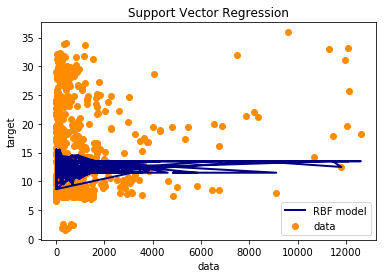

In [58]:
svr_rbf = SVR(kernel='rbf', C=1e0, gamma=100.0)
y_rbf = svr_rbf.fit(train_X, train_y).predict(train_X)

lw = 2
plt.scatter(train_X, train_y, color='darkorange', label='data')
plt.hold('on')
plt.plot(train_X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [59]:
y_pred = svr_rbf.predict(train_X)
y_true = train_y
#sum(pred-true)/nsmaples
print("MAE:",mean_absolute_error(y_true, y_pred))
print("MSE:",mean_squared_error(y_true, y_pred))
print("Median error:",median_absolute_error(y_true, y_pred))
print("R squared:",r2_score(y_true, y_pred))

MAE: 4.47478682638
MSE: 43.3558453194
Median error: 2.75032393293
R squared: 0.0676532697844


In [60]:
# only cable
data=pd.read_excel('drama_comment_link.xlsx','cableData')

In [61]:
X=[]
temp=[]
for i in range(len(data)):
    temp=[data.ix[i,'comment']]
    X.append(temp)
X = np.array(X)
y=data['rating']

clf = svm.SVR()
clf.fit(X, y)
print('R squared score\n',clf.score(X,y))
print('parameter\n',clf.get_params)

R squared score
 0.211493658643
parameter
 <bound method BaseEstimator.get_params of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)>


C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:8: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


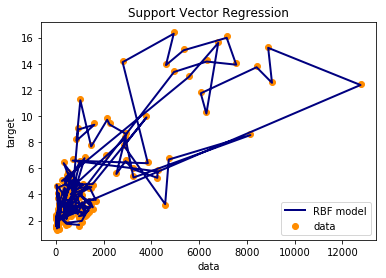

In [62]:
train_X = X
train_y = y
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_rbf = svr_rbf.fit(train_X, train_y).predict(train_X)

lw = 2
plt.scatter(train_X, train_y, color='darkorange', label='data')
plt.hold('on')
plt.plot(train_X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [63]:
y_pred = svr_rbf.predict(train_X)
y_true = train_y
#sum(pred-true)/nsmaples
print("MAE:",mean_absolute_error(y_true, y_pred))
print("MSE:",mean_squared_error(y_true, y_pred))
print("Median error:",median_absolute_error(y_true, y_pred))
print("R squared:",r2_score(y_true, y_pred))

MAE: 0.117872428655
MSE: 0.037939830008
Median error: 0.100007433829
R squared: 0.996916841226


In [64]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge

train_size = len(data)
#set kernel
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})
#set nums
X_plot = np.linspace(0, 5, 100000)[:, None]

t0 = time.time()
svr.fit(train_X, train_y)
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

t0 = time.time()
kr.fit(train_X, train_y)
kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in %.3f s"
      % kr_fit)


sv_ratio = svr.best_estimator_.support_.shape[0] / train_size
print("Support vector ratio: %.3f" % sv_ratio)

t0 = time.time()
#@param <- test data
y_svr = svr.predict(train_X)
svr_predict = time.time() - t0
print("SVR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], svr_predict))

t0 = time.time()
y_kr = kr.predict(train_X)
kr_predict = time.time() - t0
print("KRR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], kr_predict))

SVR complexity and bandwidth selected and model fitted in 0.567 s
KRR complexity and bandwidth selected and model fitted in 0.556 s
Support vector ratio: 0.950
SVR prediction for 100000 inputs in 0.001 s
KRR prediction for 100000 inputs in 0.002 s


In [65]:
print(svr.best_estimator_)
print(svr.best_score_)
print(svr.best_params_)
print(svr.best_index_)
print(svr.n_splits_)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma=0.10000000000000001, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)
-0.262308459113
{'C': 1.0, 'gamma': 0.10000000000000001}
1
5


C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:9: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


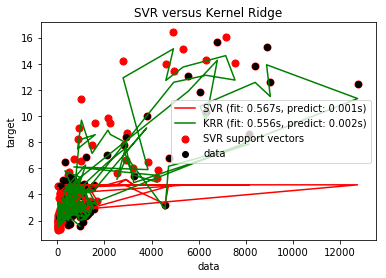

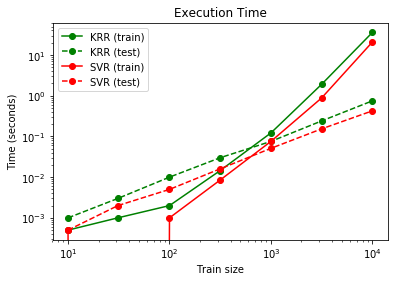

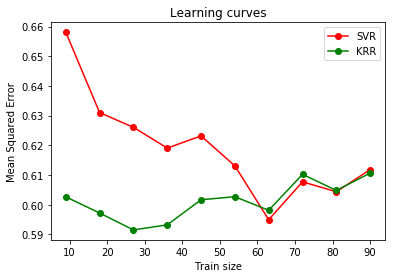

In [66]:
rng = np.random.RandomState(0)

train_X = X
train_y = y

sv_ind = svr.best_estimator_.support_
plt.scatter(train_X[sv_ind], train_y[sv_ind], c='r', s=50, label='SVR support vectors',zorder=2)
plt.scatter(train_X[:100], train_y[:100], c='k', label='data', zorder=2)
plt.hold('on')
plt.plot(train_X, y_svr, c='r',
         label='SVR (fit: %.3fs, predict: %.3fs)' % (svr_fit, svr_predict))
plt.plot(train_X, y_kr, c='g',
         label='KRR (fit: %.3fs, predict: %.3fs)' % (kr_fit, kr_predict))
plt.xlabel('data')
plt.ylabel('target')
plt.title('SVR versus Kernel Ridge')
plt.legend()

# Visualize training and prediction time
plt.figure()

# Generate sample data
X = 3000 * rng.rand(10000, 1)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))
sizes = np.logspace(1, 4, 7, dtype=np.int)
for name, estimator in {"KRR": KernelRidge(kernel='rbf', alpha=0.1,
                                           gamma=10),
                        "SVR": SVR(kernel='rbf', C=1e1, gamma=10)}.items():
    train_time = []
    test_time = []
    for train_test_size in sizes:
        t0 = time.time()
        estimator.fit(X[:train_test_size], y[:train_test_size])
        train_time.append(time.time() - t0)

        t0 = time.time()
        estimator.predict(X_plot[:1000])
        test_time.append(time.time() - t0)

    plt.plot(sizes, train_time, 'o-', color="r" if name == "SVR" else "g",
             label="%s (train)" % name)
    plt.plot(sizes, test_time, 'o--', color="r" if name == "SVR" else "g",
             label="%s (test)" % name)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Train size")
plt.ylabel("Time (seconds)")
plt.title('Execution Time')
plt.legend(loc="best")

# Visualize learning curves
plt.figure()

svr = SVR(kernel='rbf', C=1e1, gamma=0.1)
kr = KernelRidge(kernel='rbf', alpha=0.1, gamma=0.1)
train_sizes, train_scores_svr, test_scores_svr = \
    learning_curve(svr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)
train_sizes_abs, train_scores_kr, test_scores_kr = \
    learning_curve(kr, X[:100], y[:100], train_sizes=np.linspace(0.1, 1, 10),
                   scoring="neg_mean_squared_error", cv=10)

plt.plot(train_sizes, -test_scores_svr.mean(1), 'o-', color="r",label="SVR")
plt.plot(train_sizes, -test_scores_kr.mean(1), 'o-', color="g",label="KRR")
plt.xlabel("Train size")
plt.ylabel("Mean Squared Error")
plt.title('Learning curves')
plt.legend(loc="best")

plt.show()

C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:6: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


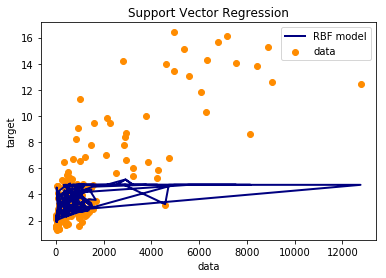

In [67]:
svr_rbf = SVR(kernel='rbf', C=1e0, gamma=0.1)
y_rbf = svr_rbf.fit(train_X, train_y).predict(train_X)

lw = 2
plt.scatter(train_X, train_y, color='darkorange', label='data')
plt.hold('on')
plt.plot(train_X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [68]:
y_pred = svr_rbf.predict(train_X)
y_true = train_y
#sum(pred-true)/nsmaples
print("MAE:",mean_absolute_error(y_true, y_pred))
print("MSE:",mean_squared_error(y_true, y_pred))
print("Median error:",median_absolute_error(y_true, y_pred))
print("R squared:",r2_score(y_true, y_pred))

MAE: 1.47413738766
MSE: 9.46682546189
Median error: 0.260253704799
R squared: 0.230683796491


In [89]:
# multi dimens
data=pd.read_excel('drama_comment_link.xlsx','predictSheet')

In [90]:
X=[]
temp=[]
for i in range(len(data)):
    temp=[data.ix[i,'day1'],data.ix[i,'day2'],data.ix[i,'day3'],data.ix[i,'day4'],data.ix[i,'day5'],data.ix[i,'day6'],data.ix[i,'day7']]
    X.append(temp)
X = np.array(X)
y=data['rating']

clf = svm.SVR()
clf.fit(X, y)
print('R squared score\n',clf.score(X,y))
print('parameter\n',clf.get_params)

R squared score
 0.142221857805
parameter
 <bound method BaseEstimator.get_params of SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)>


C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [91]:
train_X = X
train_y = y
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_rbf = svr_rbf.fit(train_X, train_y).predict(train_X)

In [92]:
y_pred = svr_rbf.predict(train_X)
y_true = train_y
#sum(pred-true)/nsmaples
print("MAE:",mean_absolute_error(y_true, y_pred))
print("MSE:",mean_squared_error(y_true, y_pred))
print("Median error:",median_absolute_error(y_true, y_pred))
print("R squared:",r2_score(y_true, y_pred))
print(svr_rbf.score)

MAE: 0.121978724751
MSE: 0.245271943443
Median error: 0.0999930472449
R squared: 0.99559233683
<bound method RegressorMixin.score of SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)>


In [76]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge

train_size = len(data)
#set kernel
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})

kr = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})
#set nums
X_plot = np.linspace(0, 5, 100000)[:, None]

t0 = time.time()
svr.fit(train_X, train_y)
svr_fit = time.time() - t0
print("SVR complexity and bandwidth selected and model fitted in %.3f s"
      % svr_fit)

t0 = time.time()
kr.fit(train_X, train_y)
kr_fit = time.time() - t0
print("KRR complexity and bandwidth selected and model fitted in %.3f s"
      % kr_fit)


sv_ratio = svr.best_estimator_.support_.shape[0] / train_size
print("Support vector ratio: %.3f" % sv_ratio)

t0 = time.time()
#@param <- test data
y_svr = svr.predict(train_X)
svr_predict = time.time() - t0
print("SVR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], svr_predict))

t0 = time.time()
y_kr = kr.predict(train_X)
kr_predict = time.time() - t0
print("KRR prediction for %d inputs in %.3f s"
      % (X_plot.shape[0], kr_predict))

SVR complexity and bandwidth selected and model fitted in 9.409 s
KRR complexity and bandwidth selected and model fitted in 11.870 s
Support vector ratio: 0.981
SVR prediction for 100000 inputs in 0.071 s
KRR prediction for 100000 inputs in 0.064 s


In [77]:
print(svr.best_estimator_)
print(svr.best_score_)
print(svr.best_params_)
print(svr.best_index_)
print(svr.n_splits_)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=100.0,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
-0.139658104406
{'C': 1.0, 'gamma': 100.0}
4
5


In [93]:
svr_rbf = SVR(kernel='rbf', C=1e0, gamma=100.0)
y_rbf = svr_rbf.fit(train_X, train_y).predict(train_X)

In [94]:
y_pred = svr_rbf.predict(train_X)
y_true = train_y
print("MAE:",mean_absolute_error(y_true, y_pred))
print("MSE:",mean_squared_error(y_true, y_pred))
print("Median error:",median_absolute_error(y_true, y_pred))
print("R squared:",r2_score(y_true, y_pred))

MAE: 4.78365735926
MSE: 47.9834926699
Median error: 2.87173357664
R squared: 0.137711919066


In [107]:
data=pd.read_excel('drama_comment_link.xlsx','deleteLastweek')
X=[]
temp=[]
for i in range(len(data)):
    temp=[data.ix[i,'day1'],data.ix[i,'day2'],data.ix[i,'day3'],data.ix[i,'day4'],data.ix[i,'day5'],data.ix[i,'day6'],data.ix[i,'day7']]
    X.append(temp)
X = np.array(X)
y=data['rating']

train_X = X
train_y = y
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_rbf = svr_rbf.fit(train_X, train_y).predict(train_X)
y_pred = svr_rbf.predict(train_X)
y_true = train_y
#sum(pred-true)/nsmaples
print("MAE:",mean_absolute_error(y_true, y_pred))
print("MSE:",mean_squared_error(y_true, y_pred))
print("Median error:",median_absolute_error(y_true, y_pred))
print("R squared:",r2_score(y_true, y_pred))

MAE: 0.124102516773
MSE: 0.269245723448
Median error: 0.0999989266092
R squared: 0.995212083517


C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [108]:
data=pd.read_excel('drama_comment_link.xlsx','terrestrialData')
X=[]
temp=[]
for i in range(len(data)):
    temp=[data.ix[i,'day1'],data.ix[i,'day2'],data.ix[i,'day3'],data.ix[i,'day4'],data.ix[i,'day5'],data.ix[i,'day6'],data.ix[i,'day7']]
    X.append(temp)
X = np.array(X)
y=data['rating']

train_X = X
train_y = y
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_rbf = svr_rbf.fit(train_X, train_y).predict(train_X)
y_pred = svr_rbf.predict(train_X)
y_true = train_y
#sum(pred-true)/nsmaples
print("MAE:",mean_absolute_error(y_true, y_pred))
print("MSE:",mean_squared_error(y_true, y_pred))
print("Median error:",median_absolute_error(y_true, y_pred))
print("R squared:",r2_score(y_true, y_pred))

MAE: 0.127748412379
MSE: 0.300170007961
Median error: 0.100015234996
R squared: 0.993544987455


C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [109]:
data=pd.read_excel('drama_comment_link.xlsx','cableData')
X=[]
temp=[]
for i in range(len(data)):
    temp=[data.ix[i,'day1'],data.ix[i,'day2'],data.ix[i,'day3'],data.ix[i,'day4'],data.ix[i,'day5'],data.ix[i,'day6'],data.ix[i,'day7']]
    X.append(temp)
X = np.array(X)
y=data['rating']

train_X = X
train_y = y
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
y_rbf = svr_rbf.fit(train_X, train_y).predict(train_X)
y_pred = svr_rbf.predict(train_X)
y_true = train_y
#sum(pred-true)/nsmaples
print("MAE:",mean_absolute_error(y_true, y_pred))
print("MSE:",mean_squared_error(y_true, y_pred))
print("Median error:",median_absolute_error(y_true, y_pred))
print("R squared:",r2_score(y_true, y_pred))

MAE: 0.099045249933
MSE: 0.00985181635994
Median error: 0.10001325899
R squared: 0.999199397729


C:\Users\TH-home\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
